<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        prepared by Abuzer Yakaryilmaz | June 25, 2019 (updated) 
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains certain macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\inner}[2]{\langle #1,#2\rangle} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> Executing quantum programs on IBMQ </h2>

We define an example quantum circuit.

In [1]:
# import the objects from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# create classical and quantum register objects a quantum circuit
qreg = QuantumRegister(2) # my quantum register
creg = ClassicalRegister(2) # my classical register 
circuit = QuantumCircuit(qreg,creg) # my quantum circuit

# apply a Hadamard gate to the first qubit

circuit.h(qreg[0])

# set the second qubit to |1>
circuit.x(qreg[1])

# apply CNOT(first_qubit,second_qubit)
circuit.cx(qreg[0],qreg[1])

# measure the both qubits
circuit.measure(qreg,creg)

We draw the circuit.

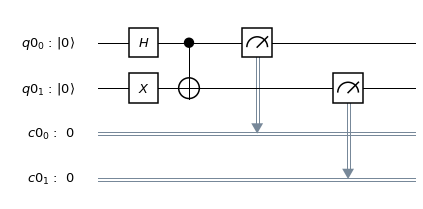

In [3]:
circuit.draw(output="mpl")

<h3>IBMQ Test</h3>

Now, we test our system for accesing to IBMQ.

<i> The remaining part requires <u>internet connection</u>.</i>

Our test circuit will be executed on IBM simulator, and then on one of IBM real qauntum computers.

<font> Please wait the execution of each cell to be completed, before executing the next cell.</font>

<h4>Joining IBM Q Experience</h4>

In order to use IBM services, one should be a member of IBM Q Experience.

Sign up and then sign in <a href="https://quantumexperience.ng.bluemix.net/qx/community" target="_blank">here</a>

After signing into the system, go to My Account (top-right icon)

Click Advanced tabs, where you can copy your API key, which is used when connecting to IBM platforms.

Under Advanced tabs, you can also see IBM Q Backend Access (available to you, under maintenance, etc.) and your Units.

<h4>Save your API on the disk</h4>

Please write YOUR IBM API TOKEN in the following cell, and then run the cell.

Once your YOUR IBM API TOKEN is saved on the disk,  it can be used directly later.

In [ ]:
from qiskit import IBMQ

IBMQ.save_account('write YOUR IBM API TOKEN here')

# Then, execute this cell

<h4> See the stored account(s) </h4>

In [ ]:
IBMQ.stored_accounts()

<h4> Load our account(s) </h4>

In [ ]:
IBMQ.load_accounts()

<h4> See the active account(s) </h4>

In [ ]:
IBMQ.active_accounts()

<h4>See available backends</h4>

In [ ]:
IBMQ.backends()

<h4> See the currently operational real quantum computer(s)</h4>

In [ ]:
IBMQ.backends(operational=True, simulator=False)

<h4> See the least busy real quantum computer </h4> 

In [ ]:
from qiskit.providers.ibmq import least_busy

least_busy(IBMQ.backends(simulator=False))

<h3> IBMQ simulator </h3>

<h4> Use the simulator as backend </h4>

In [ ]:
backend = least_busy(IBMQ.backends(simulator=True))

backend.name()

<h4> Create a job for the backend </h4>

In [ ]:
from qiskit import compile

qobj = compile(circuit, backend=backend, shots=1024)

<h4> Execute this job on the simulator </h4>

In [ ]:
job = backend.run(qobj)

<h4> Check the result </h4>

In [ ]:
result = job.result()
counts = result.get_counts()
print(counts)

<h3> IBMQ real quantum computers (Optional) </h3>

Please read the following  part to see IBM's policy for usage for the prototype real quantum computers. [accessed on March 25, 2019]
<br><br>
<div style="background-color:#eeeeee;font-size:15px;">
    <a href="https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/000-FAQ/000-Frequently_Asked_Questions.html" target="_blank"><b>Frequently Asked Questions</b></a>
<br>

...

How many experiments can I run?

You can run as many experiments as you have Units to run; each experiment execution requires between 3 and 5 Units. No Units are required to perform simulations or to recall results of an experiment that was run previously.

What happens when I run out of Units?

You can still run simulations or recall the result of the experiments that have been run previously, but you must wait for the Units to replenish, which happens either once your execution has run off the queue, or 24 hours, whichever is greater.

...
<br><br>
</div>

<font color="#000055">You can check your <b>Units</b> in your <u>IBM Q Experience account</u> (My Account > Advanced).</font> 

<h4> Use the least busy real machine as backend </h4>

In [ ]:
backend_real = least_busy(IBMQ.backends(simulator=False))

backend_real.name()

backend_real.status()

<h4> Execute the same job on a real machine </h4>

<font style="color:red">Depending on the number of pending jobs, it might take for a while to execute your job on the real machine.</font>

<u> If you do not have enough Units, you should wait for 24 hours to execute your quantum program on a real machine. </u>

<i> But, this is not a problem to complete our tutorial, because we use the local simulator during the tutorial. </i>

In [ ]:
qobj_real = compile(circuit, backend=backend_real, shots=1024)

job_real = backend_real.run(qobj_real)

job_real.queue_position()

<h4> Check the result </h4>

In [ ]:
result_real = job_real.result()
counts_real = result_real.get_counts()
print(counts_real)

<i> You may exit this notebook before getting the outcomes, if it seems to take long time.</i>

You may observe more than two outcomes, which is different than the result from the simulators. 

The expected outcomes '01' and '10' can still be observed more frequently, but we may also observe the unexpected outcomes '00' and '11'. 

The prototype quantum computers are operating with noise, and even after a single operation, there appear certain errors on the quantum states.